In [1]:
import pandas as pd
from EDA_Intial_Preprocessing import preprocessing
from algorithms import evaluation
from algorithms import logistic_regression
from algorithms import svm
from algorithms import naive_bayes

df = pd.read_csv('data.csv')
preprocessing_index = ['Standardised', 'Normalized', 'Unit Normalized']

# Returns lists of datasets that have been processed
# For each list, 0: x training data, 1: x testing data, 2: y training data and 3: y testing data
data_preprocess = preprocessing.Preprocessing(df)
data = data_preprocess.preprocess()
standardised_data = data[0]
normalized_data = data[1]
unit_normalized_data = data[2]

# Logistic Regression

In [2]:
# logistic_models = logistic_regression.get_empty_models(standardised_data, normalized_data, unit_normalized_data)
logistic_models = logistic_regression.get_empty_models()
logistic_regression_scores = evaluation.evaluate_cv(logistic_models, standardised_data, normalized_data, unit_normalized_data)
# Returns a list of the scores, 0: standardised, 1: normalized, 2: unit_normalized

In [3]:
logistic_regression_scores

[[0.9578688949289829, 0.972614247311828, 0.994489247311828],
 [0.9296942447034752, 0.9544018817204301, 0.9918724798387096],
 [0.3981877550610461, 0.6740927419354839, 0.9528015793010752]]

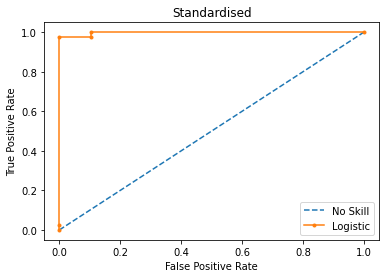

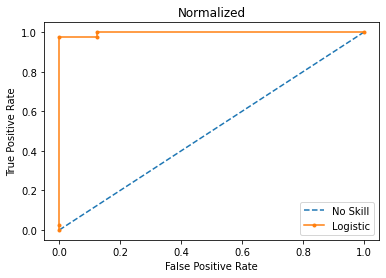

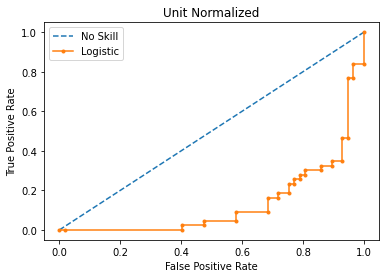

In [4]:
roc_logistic_models, roc_data = logistic_regression.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)
for i in range(3):
    evaluation.graph_roc_curve(roc_logistic_models, roc_data[i], preprocessing_index[i])

# SVM

In [5]:
svm_models = svm.get_empty_models()
svm_scores = evaluation.evaluate_cv(svm_models, standardised_data, normalized_data, unit_normalized_data)


In [6]:
svm_scores

[[0.9526017458255505, 0.9641801075268817, 0.993934811827957],
 [0.948617727489031, 0.963037634408602, 0.993422379032258],
 [0.7671113048532404, 0.8600470430107526, 0.9589381720430108]]

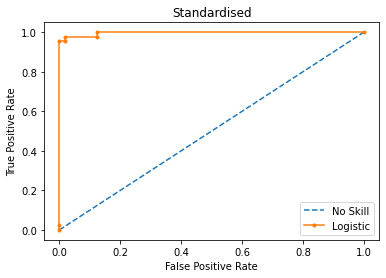

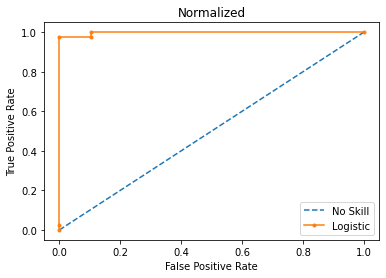

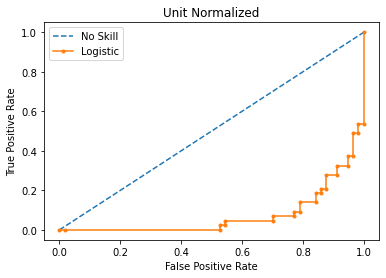

In [7]:
roc_logistic_models, roc_data = svm.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)
for i in range(3):
    evaluation.graph_roc_curve(roc_logistic_models, roc_data[i], preprocessing_index[i])

# Naive Bayes

In [8]:
gnb_models = naive_bayes.get_empty_models()
gnb_scores = evaluation.evaluate_cv(gnb_models, standardised_data, normalized_data, unit_normalized_data)

In [11]:
gnb_scores

[[0.8945812951316094, 0.9237903225806452, 0.98487063172043],
 [0.8945812951316094, 0.9237903225806452, 0.98487063172043],
 [0.867472550731722, 0.8431451612903226, 0.952385752688172]]

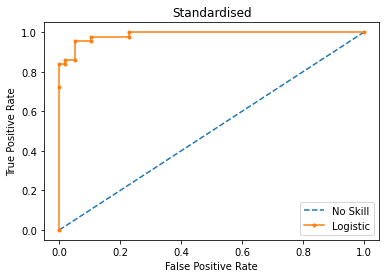

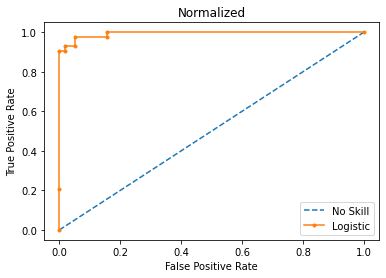

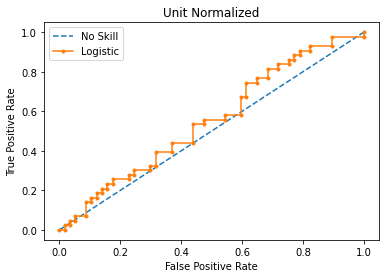

In [12]:
roc_logistic_models, roc_data = naive_bayes.get_trained_models(standardised_data, normalized_data, unit_normalized_data,
                                                               for_roc=True)
for i in range(3):
    evaluation.graph_roc_curve(roc_logistic_models, roc_data[i], preprocessing_index[i])